### Import Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Data Set

In [2]:
data=pd.read_csv('C:/Users/User/Desktop/NYC_Taxi/2019.csv')

In [3]:
data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2019-04-17 08:58:00.0000000,2019-04-17 09:04:30.0000000,N,1.0,41,42,1.0,1.20,7.0,0.0,0.5,0.0,0.0,0.3,7.8,2.0,1.0,0.0
1,2.0,2019-04-17 12:36:53.0000000,2019-04-17 12:43:34.0000000,N,1.0,41,42,1.0,1.12,7.0,0.0,0.5,0.0,0.0,0.3,7.8,2.0,1.0,0.0
2,2.0,2019-04-17 12:17:55.0000000,2019-04-17 12:25:18.0000000,N,1.0,41,42,1.0,1.28,7.0,0.0,0.5,0.0,0.0,0.3,7.8,2.0,1.0,0.0
3,2.0,2019-04-17 15:49:50.0000000,2019-04-17 15:58:01.0000000,N,1.0,41,42,1.0,1.03,7.0,0.0,0.5,0.0,0.0,0.3,7.8,2.0,1.0,0.0
4,2.0,2019-04-18 13:22:23.0000000,2019-04-18 13:29:37.0000000,N,1.0,41,42,1.0,1.35,7.0,0.0,0.5,0.0,0.0,0.3,7.8,2.0,1.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044050 entries, 0 to 6044049
Data columns (total 19 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               float64
 1   lpep_pickup_datetime   object 
 2   lpep_dropoff_datetime  object 
 3   store_and_fwd_flag     object 
 4   RatecodeID             float64
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   passenger_count        float64
 8   trip_distance          float64
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  payment_type           float64
 17  trip_type              float64
 18  congestion_surcharge   float64
dtypes: float64(14), int64(2), object(3)
memory usage: 876.1+ MB


In [5]:
# As time in object or must be in datetime 
# time is convert into datetime 

In [6]:
data["lpep_pickup_datetime"] = pd.to_datetime(data["lpep_pickup_datetime"])
data["lpep_dropoff_datetime"] = pd.to_datetime(data["lpep_dropoff_datetime"])


In [7]:
data['pickup_date'] = [d.date() for d in data['lpep_pickup_datetime']]
data['pickup_time'] = [d.time() for d in data['lpep_pickup_datetime']]

data['dropoff_date'] = [d.date() for d in data['lpep_dropoff_datetime']]
data['dropoff_time'] = [d.time() for d in data['lpep_dropoff_datetime']]



In [8]:
data.drop(["lpep_pickup_datetime"], axis = 1, inplace = True)
data.drop(["lpep_dropoff_datetime"], axis = 1, inplace = True)


In [9]:
#data["pickup_day"] = pd.to_datetime(data.pickup_date, format="%Y-%m-%d").dt.day
#data["pickup_month"] = pd.to_datetime(data.pickup_date, format="%Y-%m-%d").dt.month
#data["pickup_year"] = pd.to_datetime(data.pickup_date, format="%Y-%m-%d").dt.year



#data["dropoff_day"] = pd.to_datetime(data.dropoff_date, format="%Y-%m-%d").dt.day
#data["dropoff_month"] = pd.to_datetime(data.dropoff_date, format="%Y-%m-%d").dt.month
#data["dropoff_year"] = pd.to_datetime(data.dropoff_date, format="%Y-%m-%d").dt.year


In [10]:
data.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2.0,N,1.0,41,42,1.0,1.20,7.0,0.0,0.5,...,0.0,0.3,7.8,2.0,1.0,0.0,2019-04-17,08:58:00,2019-04-17,09:04:30
1,2.0,N,1.0,41,42,1.0,1.12,7.0,0.0,0.5,...,0.0,0.3,7.8,2.0,1.0,0.0,2019-04-17,12:36:53,2019-04-17,12:43:34
2,2.0,N,1.0,41,42,1.0,1.28,7.0,0.0,0.5,...,0.0,0.3,7.8,2.0,1.0,0.0,2019-04-17,12:17:55,2019-04-17,12:25:18
3,2.0,N,1.0,41,42,1.0,1.03,7.0,0.0,0.5,...,0.0,0.3,7.8,2.0,1.0,0.0,2019-04-17,15:49:50,2019-04-17,15:58:01
4,2.0,N,1.0,41,42,1.0,1.35,7.0,0.0,0.5,...,0.0,0.3,7.8,2.0,1.0,0.0,2019-04-18,13:22:23,2019-04-18,13:29:37


In [11]:
data["pickup_date"] = pd.to_datetime(data["pickup_date"])
data["dropoff_date"] = pd.to_datetime(data["dropoff_date"])

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6044050 entries, 0 to 6044049
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               float64       
 1   store_and_fwd_flag     object        
 2   RatecodeID             float64       
 3   PULocationID           int64         
 4   DOLocationID           int64         
 5   passenger_count        float64       
 6   trip_distance          float64       
 7   fare_amount            float64       
 8   extra                  float64       
 9   mta_tax                float64       
 10  tip_amount             float64       
 11  tolls_amount           float64       
 12  improvement_surcharge  float64       
 13  total_amount           float64       
 14  payment_type           float64       
 15  trip_type              float64       
 16  congestion_surcharge   float64       
 17  pickup_date            datetime64[ns]
 18  pickup_time           

In [13]:
data.shape

(6044050, 21)

In [14]:
data.describe().round()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,5629943.0,5629943.0,6044050.0,6044050.0,5629943.0,6044050.0,6044050.0,6044050.0,6044050.0,6044050.0,6044050.0,6044048.0,6044050.0,5629943.0,5629584.0,5083561.0
mean,2.0,1.0,108.0,129.0,1.0,3.0,14.0,1.0,0.0,1.0,0.0,0.0,17.0,1.0,1.0,0.0
std,0.0,1.0,72.0,77.0,1.0,34.0,13.0,1.0,0.0,2.0,1.0,0.0,14.0,1.0,0.0,1.0
min,1.0,1.0,1.0,1.0,0.0,-20329.0,-890.0,-4.0,-0.0,-90.0,-21.0,-0.0,-890.0,1.0,1.0,-3.0
25%,2.0,1.0,52.0,65.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0
50%,2.0,1.0,82.0,129.0,1.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0,1.0,0.0
75%,2.0,1.0,166.0,193.0,1.0,4.0,18.0,1.0,0.0,2.0,0.0,0.0,21.0,2.0,1.0,0.0
max,2.0,99.0,265.0,265.0,9.0,77844.0,4012.0,12.0,17.0,441.0,936.0,0.0,4012.0,5.0,2.0,3.0


In [15]:
data.describe().round().T

,count,mean,std,min,25%,50%,75%,max
VendorID,5629943.0,2.0,0.0,1.0,2.0,2.0,2.0,2.0
RatecodeID,5629943.0,1.0,1.0,1.0,1.0,1.0,1.0,99.0
PULocationID,6044050.0,108.0,72.0,1.0,52.0,82.0,166.0,265.0
DOLocationID,6044050.0,129.0,77.0,1.0,65.0,129.0,193.0,265.0
passenger_count,5629943.0,1.0,1.0,0.0,1.0,1.0,1.0,9.0
trip_distance,6044050.0,3.0,34.0,-20329.0,1.0,2.0,4.0,77844.0
fare_amount,6044050.0,14.0,13.0,-890.0,6.0,10.0,18.0,4012.0
extra,6044050.0,1.0,1.0,-4.0,0.0,0.0,1.0,12.0
mta_tax,6044050.0,0.0,0.0,-0.0,0.0,0.0,0.0,17.0
tip_amount,6044050.0,1.0,2.0,-90.0,0.0,0.0,2.0,441.0


### Data Preprocessing

#### Data preprocessing 
 Missing value 



In [16]:
data.isnull().sum()

VendorID                 414107
store_and_fwd_flag       414107
RatecodeID               414107
PULocationID                  0
DOLocationID                  0
passenger_count          414107
trip_distance                 0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         2
total_amount                  0
payment_type             414107
trip_type                414466
congestion_surcharge     960489
pickup_date                   0
pickup_time                   0
dropoff_date                  0
dropoff_time                  0
dtype: int64

In [17]:
data.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2.0,N,1.0,41,42,1.0,1.20,7.0,0.0,0.5,...,0.0,0.3,7.8,2.0,1.0,0.0,2019-04-17,08:58:00,2019-04-17,09:04:30
1,2.0,N,1.0,41,42,1.0,1.12,7.0,0.0,0.5,...,0.0,0.3,7.8,2.0,1.0,0.0,2019-04-17,12:36:53,2019-04-17,12:43:34
2,2.0,N,1.0,41,42,1.0,1.28,7.0,0.0,0.5,...,0.0,0.3,7.8,2.0,1.0,0.0,2019-04-17,12:17:55,2019-04-17,12:25:18
3,2.0,N,1.0,41,42,1.0,1.03,7.0,0.0,0.5,...,0.0,0.3,7.8,2.0,1.0,0.0,2019-04-17,15:49:50,2019-04-17,15:58:01
4,2.0,N,1.0,41,42,1.0,1.35,7.0,0.0,0.5,...,0.0,0.3,7.8,2.0,1.0,0.0,2019-04-18,13:22:23,2019-04-18,13:29:37


<AxesSubplot:>

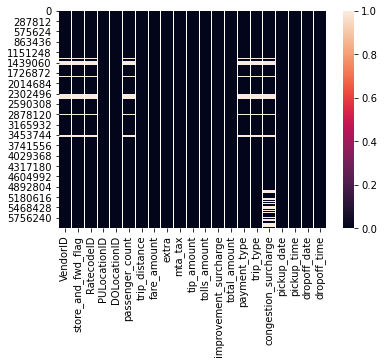

In [18]:
sns.heatmap(data.isnull())

In [19]:
# Before fit Missing Value

In [20]:
data[['VendorID','store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type','congestion_surcharge','trip_type']]

,VendorID,store_and_fwd_flag,RatecodeID,passenger_count,payment_type,trip_type,congestion_surcharge,trip_type
0,2.0,N,1.0,1.0,2.0,1.0,0.0,1.0
1,2.0,N,1.0,1.0,2.0,1.0,0.0,1.0
2,2.0,N,1.0,1.0,2.0,1.0,0.0,1.0
3,2.0,N,1.0,1.0,2.0,1.0,0.0,1.0
4,2.0,N,1.0,1.0,2.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
6044045,2.0,N,5.0,1.0,1.0,2.0,0.0,2.0
6044046,2.0,N,5.0,1.0,1.0,2.0,0.0,2.0
6044047,2.0,N,5.0,1.0,1.0,2.0,0.0,2.0
6044048,2.0,N,5.0,1.0,1.0,2.0,0.0,2.0


<AxesSubplot:xlabel='trip_type', ylabel='Density'>

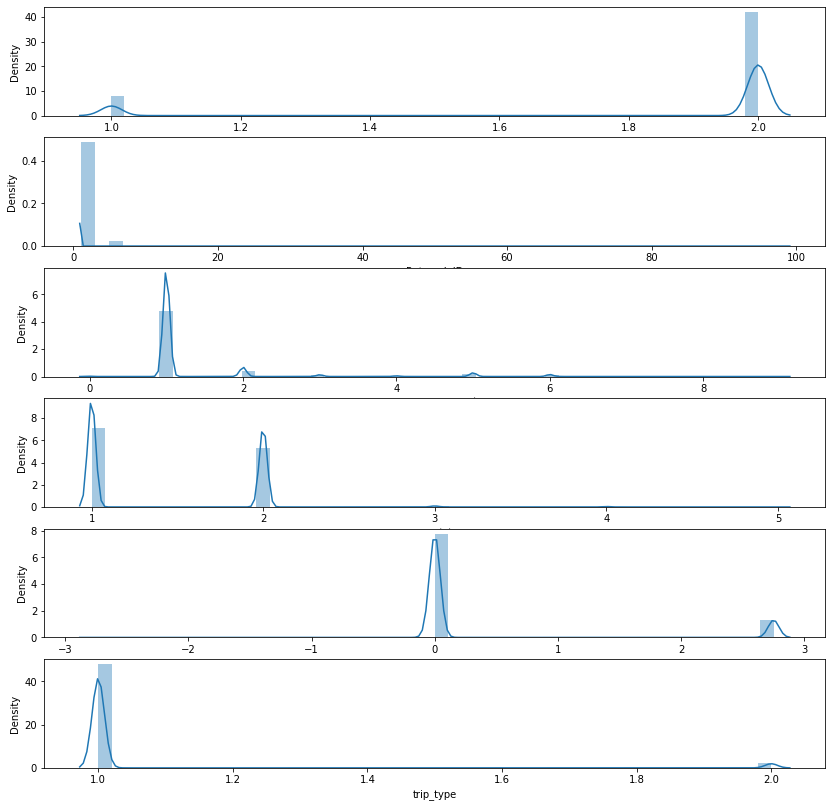

In [21]:
plt.figure(figsize=(14,14))
plt.subplot(6,1,1)
sns.distplot(data['VendorID'])


# cateorical value cannot plot
#plt.subplot(3,1,2)
#sns.distplot(data['store_and_fwd_flag'])

plt.subplot(6,1,2)
sns.distplot(data['RatecodeID'])

plt.subplot(6,1,3)
sns.distplot(data['passenger_count'])

plt.subplot(6,1,4)
sns.distplot(data['payment_type'])

plt.subplot(6,1,5)
sns.distplot(data['congestion_surcharge'])

plt.subplot(6,1,6)
sns.distplot(data['trip_type'])




In [22]:
# Here we use mode we follow the trend of the data set from the graph we estimated that we used mode 

In [23]:
print('mode of Vendor ID =' ,data['VendorID'].mode()[0])
print('mode of RatecodeID =' ,data['RatecodeID'].mode()[0])
print('mode of passenger_count =' ,data['passenger_count'].mode()[0])
print('mode of payment_type =' ,data['payment_type'].mode()[0])
print('mode of congestion_surcharge =' ,data['congestion_surcharge'].mode()[0])
print('mode of trip_type =' ,data['trip_type'].mode()[0])



mode of Vendor ID = 2.0
mode of RatecodeID = 1.0
mode of passenger_count = 1.0
mode of payment_type = 1.0
mode of congestion_surcharge = 0.0
mode of trip_type = 1.0


In [24]:
data['VendorID']=data['VendorID'].fillna(data['VendorID'].mode()[0])
data['RatecodeID']=data['RatecodeID'].fillna(data['RatecodeID'].mode()[0])
data['passenger_count']=data['passenger_count'].fillna(data['passenger_count'].mode()[0])
data['payment_type']=data['payment_type'].fillna(data['payment_type'].mode()[0])
data['congestion_surcharge']=data['congestion_surcharge'].fillna(data['congestion_surcharge'].mode()[0])
data['trip_type']=data['trip_type'].fillna(data['trip_type'].mode()[0])

In [25]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].replace(np.nan , 'N')


In [26]:
# After handle the missing value

In [27]:
data.isnull().sum()

VendorID                 0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    2
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
pickup_date              0
pickup_time              0
dropoff_date             0
dropoff_time             0
dtype: int64

In [28]:
data[['VendorID','store_and_fwd_flag','RatecodeID','passenger_count','payment_type','trip_type','congestion_surcharge','trip_type']].describe().round()

,VendorID,RatecodeID,passenger_count,payment_type,trip_type,congestion_surcharge,trip_type
count,6044050.0,6044050.0,6044050.0,6044050.0,6044050.0,6044050.0,6044050.0
mean,2.0,1.0,1.0,1.0,1.0,0.0,1.0
std,0.0,1.0,1.0,1.0,0.0,1.0,0.0
min,1.0,1.0,0.0,1.0,1.0,-3.0,1.0
25%,2.0,1.0,1.0,1.0,1.0,0.0,1.0
50%,2.0,1.0,1.0,1.0,1.0,0.0,1.0
75%,2.0,1.0,1.0,2.0,1.0,0.0,1.0
max,2.0,99.0,9.0,5.0,2.0,3.0,2.0


In [29]:
# Data After handling the missing value

In [30]:
data.dropna()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time
0,2.0,N,1.0,41,42,1.0,1.20,7.00,0.0,0.5,...,0.00,0.3,7.80,2.0,1.0,0.0,2019-04-17,08:58:00,2019-04-17,09:04:30
1,2.0,N,1.0,41,42,1.0,1.12,7.00,0.0,0.5,...,0.00,0.3,7.80,2.0,1.0,0.0,2019-04-17,12:36:53,2019-04-17,12:43:34
2,2.0,N,1.0,41,42,1.0,1.28,7.00,0.0,0.5,...,0.00,0.3,7.80,2.0,1.0,0.0,2019-04-17,12:17:55,2019-04-17,12:25:18
3,2.0,N,1.0,41,42,1.0,1.03,7.00,0.0,0.5,...,0.00,0.3,7.80,2.0,1.0,0.0,2019-04-17,15:49:50,2019-04-17,15:58:01
4,2.0,N,1.0,41,42,1.0,1.35,7.00,0.0,0.5,...,0.00,0.3,7.80,2.0,1.0,0.0,2019-04-18,13:22:23,2019-04-18,13:29:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6044045,2.0,N,5.0,215,75,1.0,15.10,42.60,0.0,0.5,...,5.76,0.0,48.86,1.0,2.0,0.0,2019-02-21,06:40:33,2019-02-21,07:18:04
6044046,2.0,N,5.0,69,75,1.0,5.56,19.21,0.0,0.5,...,5.76,0.0,25.47,1.0,2.0,0.0,2019-02-21,08:14:12,2019-02-21,08:40:52
6044047,2.0,N,5.0,76,75,1.0,17.89,50.79,0.0,0.5,...,5.76,0.0,57.05,1.0,2.0,0.0,2019-02-21,08:57:57,2019-02-21,09:43:06
6044048,2.0,N,5.0,210,75,1.0,22.21,77.64,0.0,0.5,...,5.76,0.0,83.90,1.0,2.0,0.0,2019-02-21,10:02:48,2019-02-21,10:57:42


In [31]:
data.isnull().sum()

VendorID                 0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    2
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
pickup_date              0
pickup_time              0
dropoff_date             0
dropoff_time             0
dtype: int64

<AxesSubplot:>

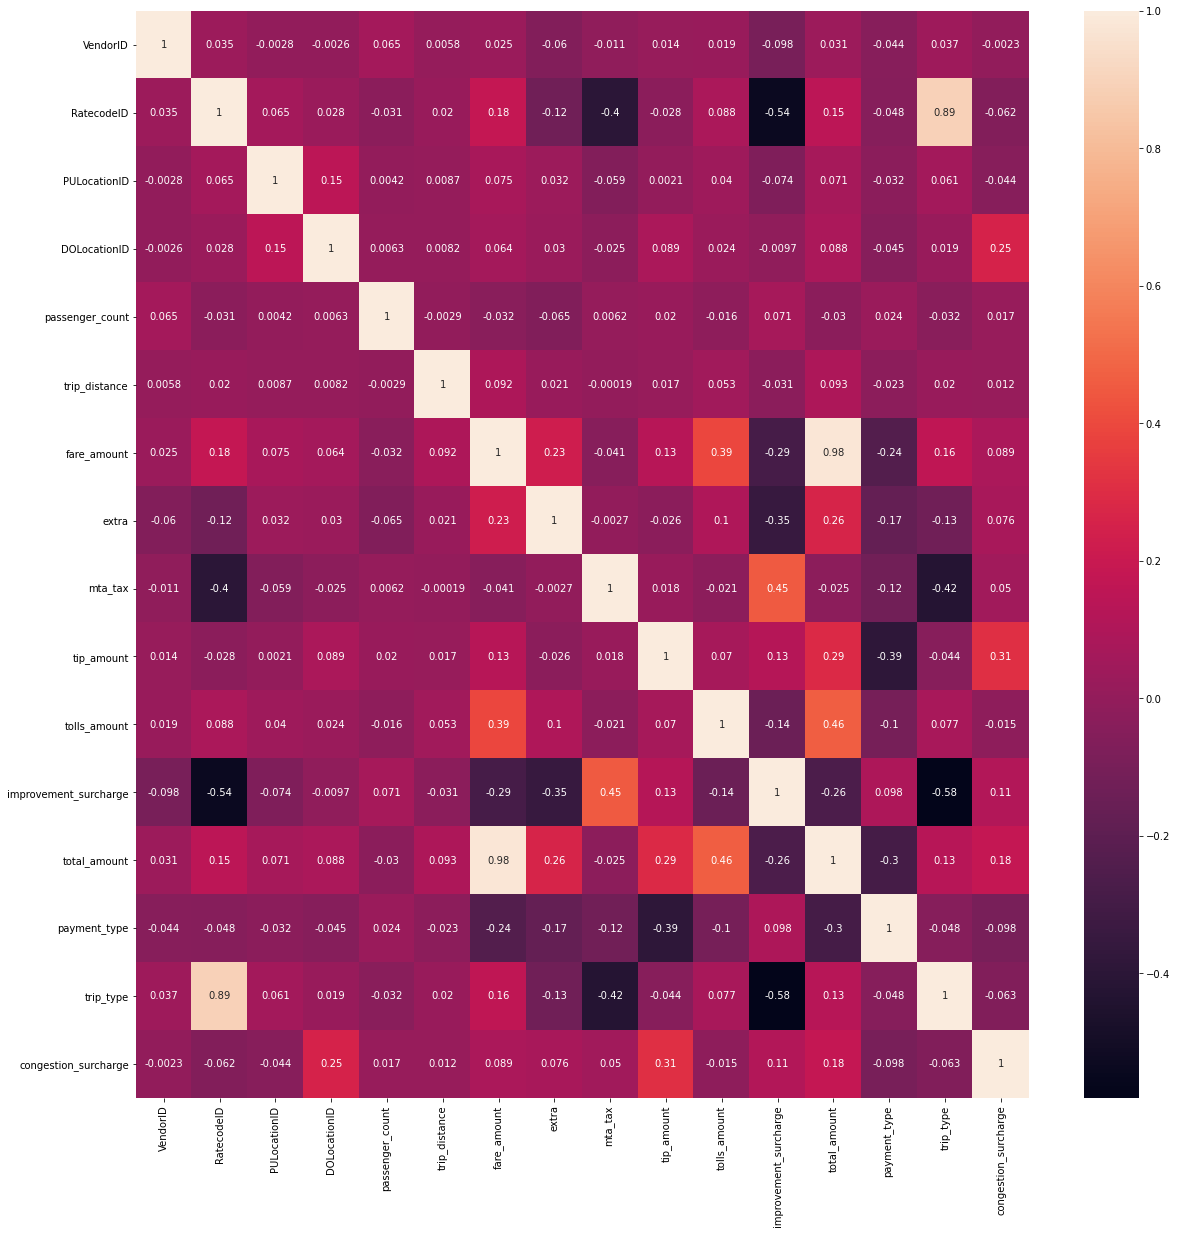

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr() , annot=True)

<AxesSubplot:xlabel='payment_type'>

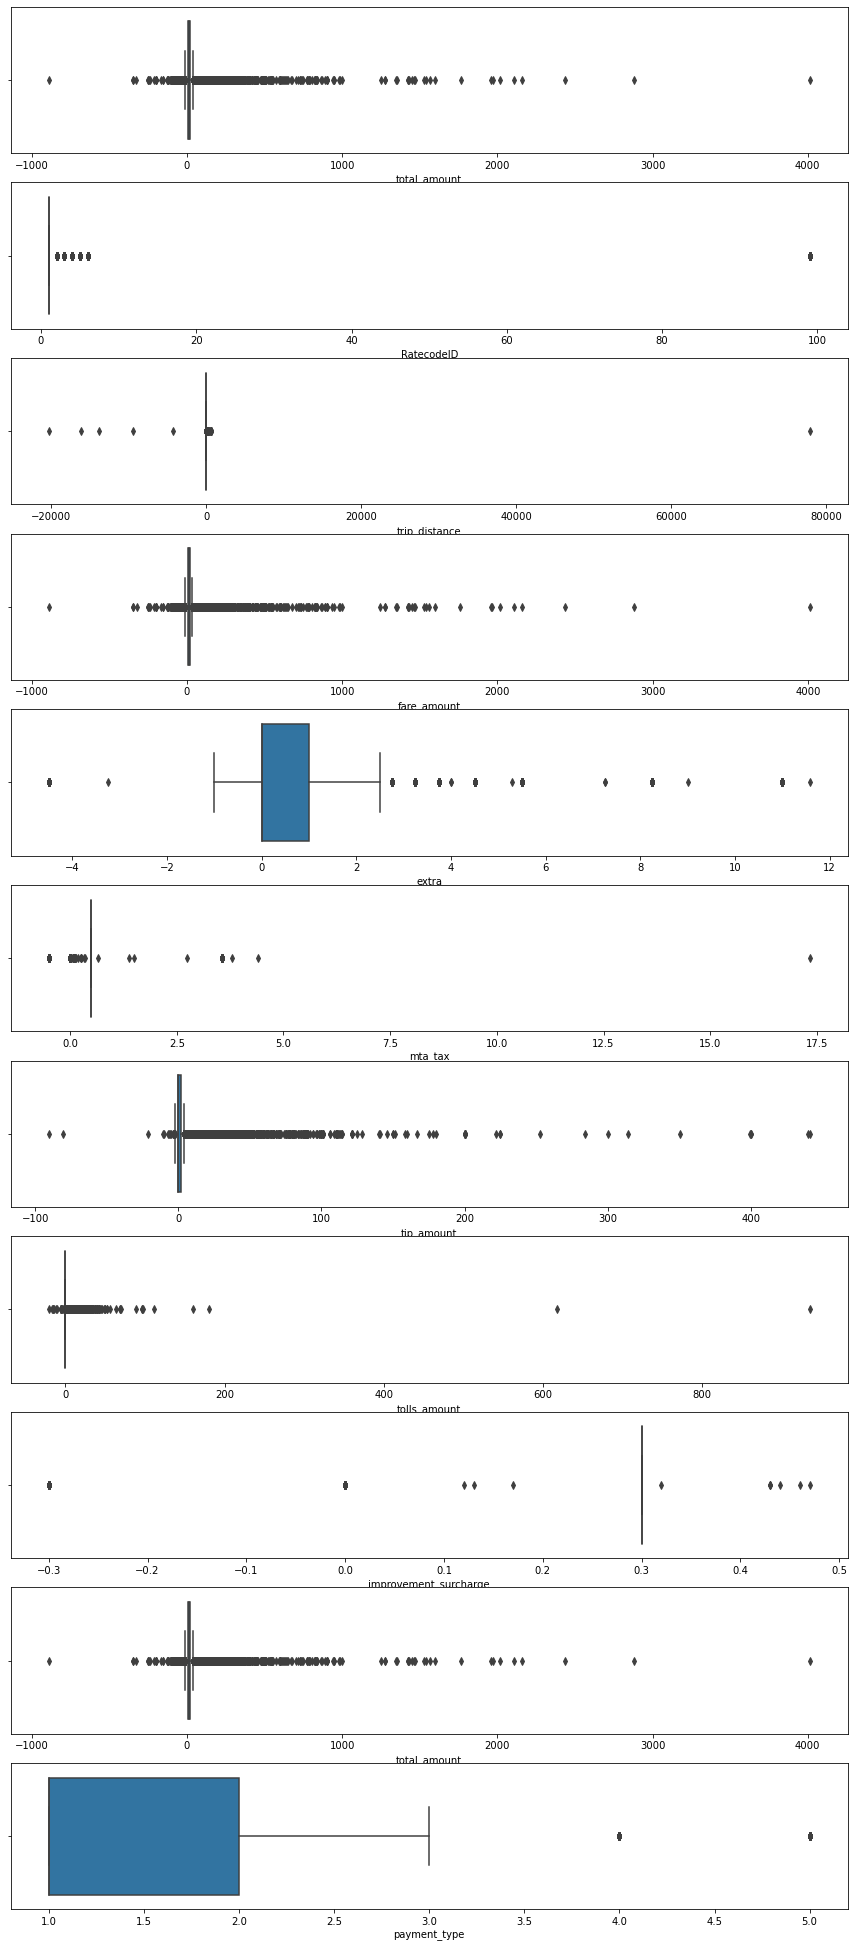

In [33]:
plt.figure(figsize=(15,35))
plt.subplot(11,1,1)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,2)
sns.boxplot(data['RatecodeID'])
plt.subplot(11,1,3)
sns.boxplot(data['trip_distance'])
plt.subplot(11,1,4)
sns.boxplot(data['fare_amount'])
plt.subplot(11,1,5)
sns.boxplot(data['extra'])
plt.subplot(11,1,6)
sns.boxplot(data['mta_tax'])
plt.subplot(11,1,7)
sns.boxplot(data['tip_amount'])
plt.subplot(11,1,8)
sns.boxplot(data['tolls_amount'])
plt.subplot(11,1,9)
sns.boxplot(data['improvement_surcharge'])
plt.subplot(11,1,10)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,11)
sns.boxplot(data['payment_type'])

In [34]:
data= data[(data['total_amount'] < 16.8) & (data['total_amount'] > 2) ]
data= data[(data['RatecodeID'] < 1.8) & (data['total_amount'] > 0)]
data= data[(data['trip_distance'] < 2.5)  & (data['trip_distance'] > -0.5)]
data= data[(data['fare_amount'] < 13) & (data['fare_amount'] > 0.5) ]
data= data[(data['extra'] < 1.5) & (data['extra'] > 0) ]
data= data[(data['mta_tax'] < 0.6) & (data['mta_tax'] > 0.4) ]
data= data[(data['tip_amount'] < 3.7) & (data['tip_amount'] > -1) ]
data= data[(data['tolls_amount'] < 0.01) & (data['tolls_amount'] > -0.5) ]
data= data[(data['improvement_surcharge'] < 0.35) & (data['improvement_surcharge'] > 0.2) ]
data= data[(data['payment_type'] < 1.6) & (data['payment_type'] > 0.0) ]

<AxesSubplot:xlabel='payment_type'>

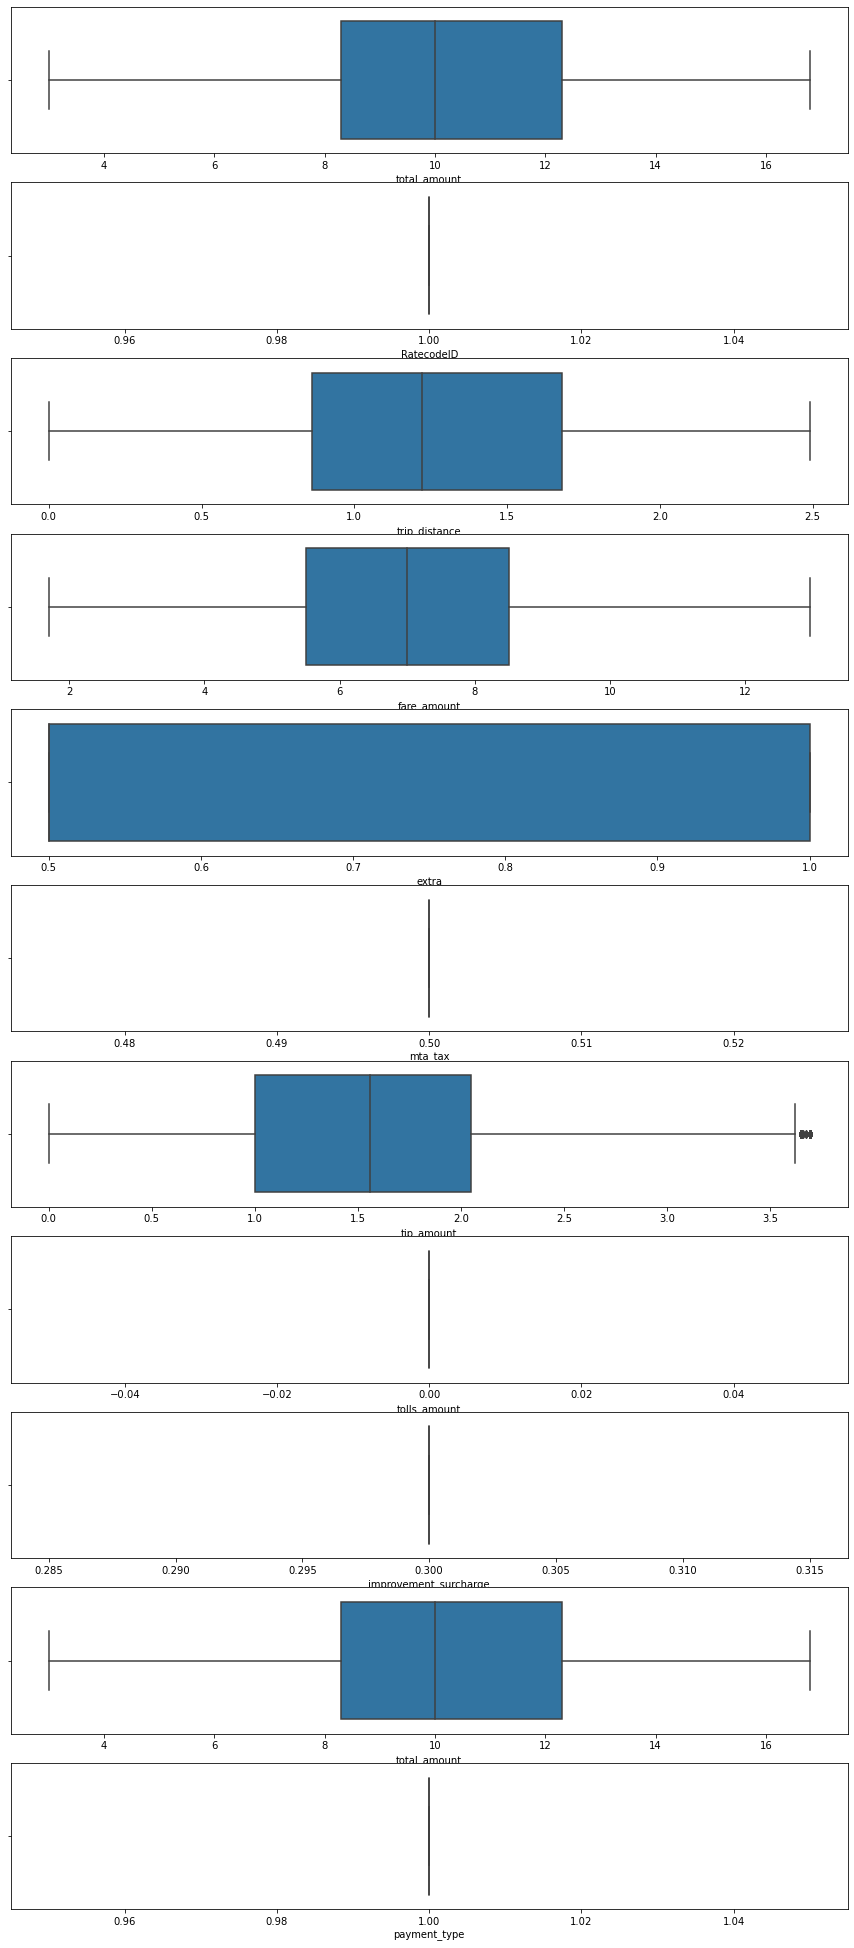

In [35]:
plt.figure(figsize=(15,35))
plt.subplot(11,1,1)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,2)
sns.boxplot(data['RatecodeID'])
plt.subplot(11,1,3)
sns.boxplot(data['trip_distance'])
plt.subplot(11,1,4)
sns.boxplot(data['fare_amount'])
plt.subplot(11,1,5)
sns.boxplot(data['extra'])
plt.subplot(11,1,6)
sns.boxplot(data['mta_tax'])
plt.subplot(11,1,7)
sns.boxplot(data['tip_amount'])
plt.subplot(11,1,8)
sns.boxplot(data['tolls_amount'])
plt.subplot(11,1,9)
sns.boxplot(data['improvement_surcharge'])
plt.subplot(11,1,10)
sns.boxplot(data['total_amount'])
plt.subplot(11,1,11)
sns.boxplot(data['payment_type'])

In [36]:
# After removin an ouliers

<AxesSubplot:>

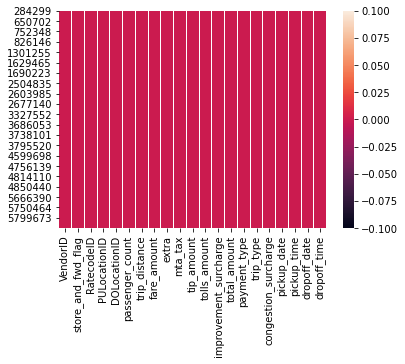

In [64]:
sns.heatmap(data.isnull())

In [38]:
data.head()

,VendorID,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,...,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,pickup_date,pickup_time,dropoff_date,dropoff_time
284299,2.0,N,1.0,100,137,1.0,1.26,6.5,0.5,0.5,...,0.0,0.3,10.3,1.0,1.0,2.5,2019-05-07,23:53:09,2019-05-07,23:59:50
284301,2.0,N,1.0,231,246,1.0,1.93,9.0,0.5,0.5,...,0.0,0.3,12.8,1.0,1.0,2.5,2019-05-14,20:13:32,2019-05-14,20:23:00
284302,2.0,N,1.0,90,68,1.0,0.75,5.0,0.5,0.5,...,0.0,0.3,8.8,1.0,1.0,2.5,2019-05-14,20:30:43,2019-05-14,20:35:08
284304,2.0,N,1.0,186,163,1.0,1.52,7.0,0.5,0.5,...,0.0,0.3,10.8,1.0,1.0,2.5,2019-05-22,00:04:12,2019-05-22,00:10:35
284427,2.0,N,1.0,170,161,1.0,0.77,5.0,1.0,0.5,...,0.0,0.3,9.3,1.0,1.0,2.5,2019-05-20,18:56:58,2019-05-20,19:01:19


<AxesSubplot:xlabel='total_amount', ylabel='trip_distance'>

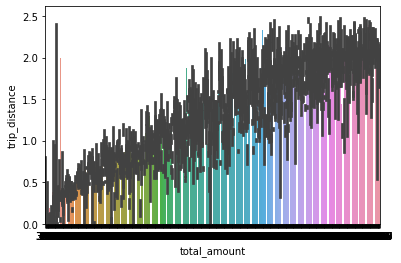

In [39]:
# passenger count with the trip distance
sns.barplot(y=data['trip_distance'], x=data['total_amount'] )

<AxesSubplot:xlabel='total_amount', ylabel='passenger_count'>

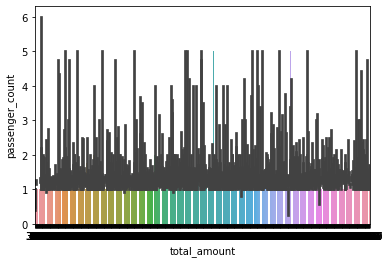

In [40]:
# mean of passenger coount 
sns.barplot(y=data['passenger_count'],x=data['total_amount'])

<AxesSubplot:ylabel='payment_type'>

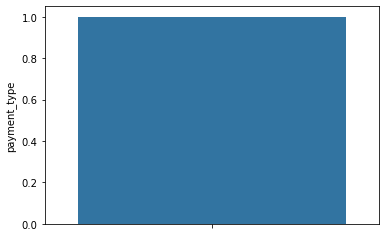

In [41]:
# average total amount spend from the passenger 
sns.barplot(y=data['payment_type'],  hue=data['payment_type'])

<AxesSubplot:xlabel='mta_tax', ylabel='total_amount'>

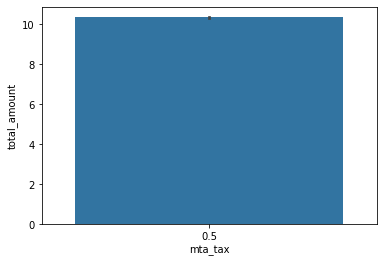

In [42]:
# total amount with mta_tax
sns.barplot(y=data['total_amount'] , x=data['mta_tax'])

## Split data  set

In [43]:
x =data[['trip_type' ,'payment_type', 'trip_distance' , 'passenger_count','PULocationID','DOLocationID']]
y=data[['fare_amount']]

In [44]:
x.head()

,trip_type,payment_type,trip_distance,passenger_count,PULocationID,DOLocationID
284299,1.0,1.0,1.26,1.0,100,137
284301,1.0,1.0,1.93,1.0,231,246
284302,1.0,1.0,0.75,1.0,90,68
284304,1.0,1.0,1.52,1.0,186,163
284427,1.0,1.0,0.77,1.0,170,161


In [45]:
y.head()

,fare_amount
284299,6.5
284301,9.0
284302,5.0
284304,7.0
284427,5.0


### Test train split data set / Model Selction


In [46]:
from sklearn.model_selection import train_test_split
x_train ,x_test ,y_train, y_test =train_test_split(x,y,test_size=0.2 ,random_state=0)

In [47]:
print('size of x_train' , x_train.shape)
print('size of x_test' , x_test.shape)
print('size of y_train' , x_train.shape)
print('size of y_test' , x_test.shape)

size of x_train (604138, 6)
size of x_test (151035, 6)
size of y_train (604138, 6)
size of y_test (151035, 6)


### Model selection

In [48]:
from sklearn.linear_model import LinearRegression
model=LinearRegression().fit(x_train ,y_train)

### Model Evalotion

In [49]:
model.score(x_test, y_test)

0.7547995635560455

In [50]:
model.score(x_train , y_train)

0.7541523877368124

In [51]:
print('Score for test model =' , model.score(x_test , y_test)  )
print('Score for train model =' , model.score(x_train , y_train) )

Score for test model = 0.7547995635560455
Score for train model = 0.7541523877368124


 
### Price prediction

In [52]:
#'trip_type' ,'payment_type', 'trip_distance' ,
#'passenger_count','PULocationID','DOLocationID'
model.predict([[1,2 ,1.5,1,45,74]])

array([[7.9442082]])

In [53]:
mlr = pd.DataFrame({'Actual_value' : y_test.squeeze() , "Model prediction" : model.predict(x_test).squeeze() })
mlr

,Actual_value,Model prediction
3782500,8.5,8.085466
5730547,7.0,7.204643
4832319,7.0,7.071995
3725458,6.0,6.160564
2591150,9.5,7.591624
...,...,...
3741772,7.5,9.520715
4778272,6.0,6.071512
4809923,9.5,9.779479
3730370,5.0,5.081631


## Future prediction

In [54]:
model.predict([[1,2 ,1.5,1,45,67]])

array([[7.94934238]])

In [55]:
# 

In [56]:
## Error

In [57]:
from sklearn import metrics

In [58]:
print('mean absolute error', metrics.mean_absolute_error(y_test , model.predict(x_test)) )

mean absolute error 0.7445271800000659


In [59]:
print('mean square error' ,metrics.mean_squared_error(y_test,model.predict(x_test)))

mean square error 1.0481996558642102


In [60]:
print('root mean square error' ,np.sqrt(metrics.mean_squared_error(y_test,model.predict(x_test))))

root mean square error 1.0238162217235134


In [61]:
# Graph

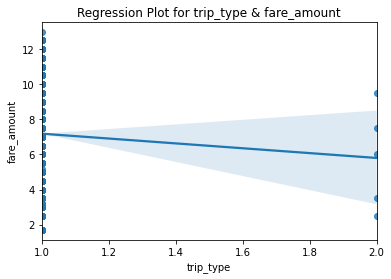

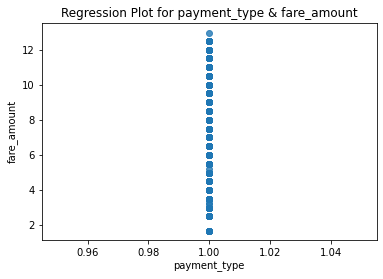

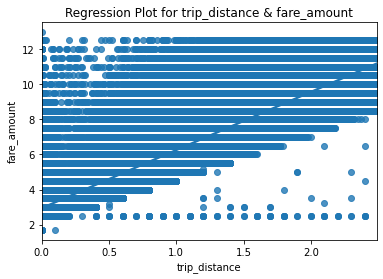

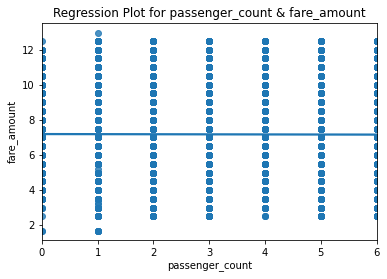

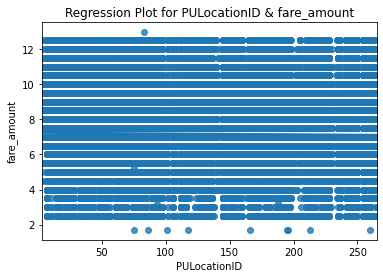

KeyboardInterrupt: 

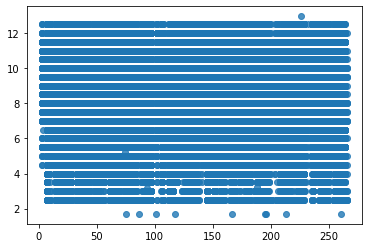

In [62]:
variables =['trip_type' ,'payment_type', 'trip_distance' , 'passenger_count','PULocationID','DOLocationID']
y=data[['fare_amount']]

for var in variables:
    sns.regplot(x_train[var],y_train['fare_amount']).set(title=f'Regression Plot for {var} & fare_amount')
    plt.show()

### Conclusion

#The Multiple Linear Regression model performs well as 58.75% of the data fit the regression model.

---